# **Question 1: Principle Component Analysis for Data Compression**

**Importing libraries**

In [ ]:
import matplotlib.pyplot as plt 
from PIL import Image
from skimage import io
import numpy as np 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Implementing Principal Component Analysis from scratch**

In [ ]:
#Splitting the image into 3 different components i.e., red, green, blue.
def split_components(img):
    red = img[:,:,0] 
    green = img[:,:,1]
    blue = img[:,:,2]
    return red, green, blue
    
# Calculating the eigen values and vectors
def cal_eigen(im_mat):
    mea = np.mean(im_mat)
    conv_mat = im_mat - mea 
    eig_val, eig_vec = np.linalg.eigh(np.cov(conv_mat))
    return mea, conv_mat, eig_val, eig_vec

def sorting_values(eig_val, eig_vec):
    ev_sort = np.argsort(eig_val)
    isort = ev_sort[::-1]
    e_val, e_vec = eig_val[isort], eig_vec[:,isort]
    return e_val, e_vec

#Calculating the PCA scores
def p_c_a(im_mat, feature_count):
    mea, covariance_mat, eig_val, eig_vec = cal_eigen(im_mat)
    e_val, e_vec = sorting_values(eig_val, eig_vec)
    var = sum(e_val[0:feature_count])/sum(e_val)
    e_vec = e_vec[:, range(feature_count)]
    score = np.dot(e_vec, np.dot(e_vec.T, covariance_mat)) + mea.T
    reconstructed_image = np.uint8(np.absolute(score))
    return reconstructed_image, var


**Applying PCA on the given image and reconstructing the Image with different number of features**

Image with 100 features:


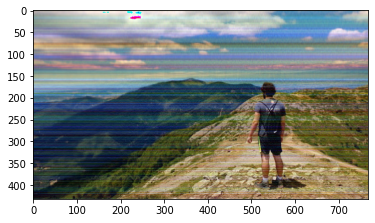

Image with 200 features:


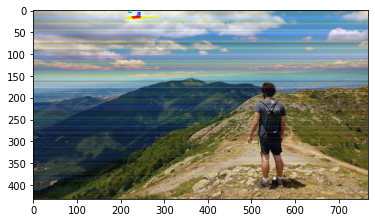

Image with 300 features:


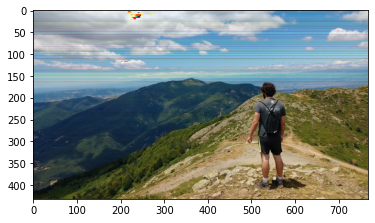

Image with 400 features:


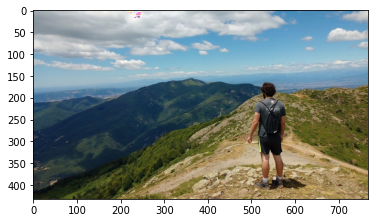

In [ ]:
#Importing the image
picture = io.imread('/content/hw3_1.jpeg')
im_mat = np.array(picture)
red, green, blue = split_components(im_mat)
c = [100,200,300,400]
red_variance, green_variance, blue_variance= [], [] ,[]

#Applying PCA on all the components of the image
for no_of_components in c:
    reconstructed_red_comp, red_va = p_c_a(red,no_of_components)
    red_variance.append(red_va)
    reconstructed_green_comp, green_va = p_c_a(green,no_of_components)
    green_variance.append(green_va)
    reconstructed_blue_comp, blue_va =  p_c_a(blue,no_of_components)
    blue_variance.append(blue_va)
    components = (reconstructed_red_comp, reconstructed_green_comp, reconstructed_blue_comp)
    recon_color_img = np.dstack(components)
    recon_color_img = Image.fromarray(recon_color_img)
    #Displaying the reconstructed image with the respective number of features it was reconstructed on
    print("Image with",no_of_components,"features:")
    plt.imshow(recon_color_img)
    plt.show()

**Plot for accumulative variance (y-axis) with the number
of principle components (x-axis)** **bold text**

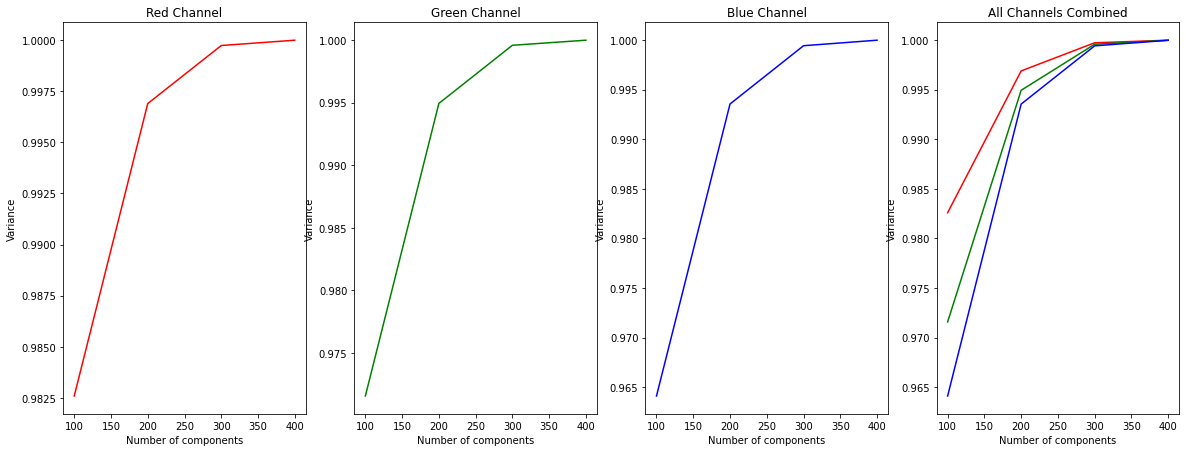

In [ ]:
fig = plt.figure(figsize = (20, 7.2)) 
fig.add_subplot(1,4,1)
plt.title("Red Channel")
plt.xlabel("Number of components")
plt.ylabel("Variance")
plt.plot(c, red_variance, color = 'red')

fig.add_subplot(1,4,2)
plt.title("Green Channel")
plt.xlabel("Number of components")
plt.ylabel("Variance")
plt.plot(c, green_variance, color = 'green')

fig.add_subplot(1,4,3)
plt.title("Blue Channel")
plt.xlabel("Number of components")
plt.ylabel("Variance")
plt.plot(c, blue_variance, color = 'blue')

fig.add_subplot(1,4,4)
plt.title("All Channels Combined")
plt.xlabel("Number of components")
plt.ylabel("Variance")
plt.plot(c, red_variance, color = 'red')
plt.plot(c, green_variance, color = 'green')
plt.plot(c, blue_variance, color = 'blue')

plt.show()

**References used:**

https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

https://towardsdatascience.com/rgb-color-image-compression-using-principal-component-analysis-fce3f48dfdd0

https://www.section.io/engineering-education/image-compression-using-pca/



## **Question 2: Naive Bayes**

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the dataset:**

In [ ]:
#Arabic
arabic_data = pd.read_csv("/content/drive/MyDrive/programming assignments/Data sets/arabic.txt")

In [ ]:
#Greek
greek_data = pd.read_csv("/content/drive/MyDrive/programming assignments/Data sets/greek.txt")

In [ ]:
#Japanese
japan_data = pd.read_csv("/content/drive/MyDrive/programming assignments/Data sets/japan.txt")

In [ ]:
#American
us_data = pd.read_csv("/content/drive/MyDrive/programming assignments/Data sets/us.txt")

In [ ]:
arabic_data.head()

,Names
0,رواء الموركة
1,نشوة الشامي
2,الدكتورة يسرى أفغاني
3,سنام الزرقان
4,المهندسة ليان القواسم


**Adding the label column for all the datasets:**

In [ ]:
arabic_data['Label'] = 'Arabic'

In [ ]:
arabic_data.head()

,Names,Label
0,رواء الموركة,Arabic
1,نشوة الشامي,Arabic
2,الدكتورة يسرى أفغاني,Arabic
3,سنام الزرقان,Arabic
4,المهندسة ليان القواسم,Arabic


In [ ]:
greek_data['Label'] = 'Greek'

In [ ]:
greek_data.head()

,Names,Label
0,Αρίσταρχος Καρανίκας,Greek
1,Βέρα Δώρη,Greek
2,Ρέα-Ναυσικά Λαλαούνη,Greek
3,Ιοκάστη-Ηράκλεια Γαλανάκη,Greek
4,Λήδα-Μελπομένη Φωτιάδου,Greek


In [ ]:
japan_data['Label'] = 'Japanese'

In [ ]:
japan_data.head()

,Names,Label
0,鈴木 直子,Japanese
1,中川 陽一,Japanese
2,田中 香織,Japanese
3,林 零,Japanese
4,小林 千代,Japanese


In [ ]:
us_data['Label'] = 'American'

In [ ]:
us_data.head()

,Names,Label
0,Timothy Moses,American
1,Anna Barajas,American
2,James Caldwell,American
3,Mr. Michael Cole,American
4,Jeffrey Collier,American


In [ ]:
arabic_data.shape

(1000, 2)

In [ ]:
greek_data.shape

(1000, 2)

In [ ]:
japan_data.shape

(1000, 2)

In [ ]:
us_data.shape

(1000, 2)

**Combining all the four datasets:**

In [ ]:
merge_data = pd.concat([arabic_data,greek_data,japan_data,us_data])

In [ ]:
merge_data.shape

(4000, 2)

**Data Preprocessing:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Using CountVectorizer to transform the given names into a vector 

vectorizer = CountVectorizer().fit(merge_data['Names'])
Input = vectorizer.transform(merge_data['Names'])
X_input = Input.toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder

#converting the labels into a numeric form (to unique integers)

label_encoder = LabelEncoder().fit(merge_data['Label'])
label = label_encoder.transform(merge_data['Label'])

**Train-test split:**

In [ ]:
#splitting the dataset into train and test sets with shuffle = true

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_input, label, test_size=0.3, shuffle = True, random_state=42)

In [ ]:
X_train.shape

(2800, 3043)

In [ ]:
X_test.shape

(1200, 3043)

**Model Implementation:**

In [ ]:
#Multinomial naive bayes from scratch
class MultinomialNaiveBayes:

    def __init__(self,lap_smooth=1):
        self.lap_smooth = lap_smooth
    
    #For each unique class in y, calculating prior 
    def prior(self): 
        prior_y = np.zeros((self.n_labels))
        _, self.unique = np.unique(self.y,return_counts=True)
        for i in range(self.labels.shape[0]):
            prior_y[i] = self.unique[i] / self.n_sample_names
        return prior_y
            
    #Fitting the labels according to the sample names
    def fit(self, X, y): 
        self.y = y
        self.n_sample_names, self.n_feat = X.shape
        self.labels = np.unique(y)
        self.n_labels = self.labels.shape[0]
        #list of priors for each y
        self.label_priors = self.prior() 
            
        self.c_v = np.zeros((self.n_labels, self.n_feat))
        self.c_v_bar = np.zeros((self.n_labels)) 
        for i in self.labels: 
            index = np.argwhere(self.y==i).flatten()
            columns_sum = []
            for j in range(self.n_feat):
                columns_sum.append(np.sum(X[index,j]))
                
            self.c_v[i] = columns_sum 
            self.c_v_bar[i] = np.sum(columns_sum) 
    
    #Calculates likelihood, finds the best probability for a sample name given a particular label
    def likelihood(self, x, k):
        ind_likelihood = []
        i = 0
        while i < x.shape[0]:
            # c_v is the count of features with a feature value of x_i for feature index i and class label k.
            # c_v_bar is the number of features in class k.
            c_v = self.c_v[k,i]
            c_v_bar  = self.c_v_bar[k]
            temp =  ((c_v + self.lap_smooth )/ (c_v_bar + (self.lap_smooth * self.n_feat)))**x[i]
            ind_likelihood.append(temp)
            i += 1
        
        return np.prod(ind_likelihood)
    
    #Predicting the label of the test data
    def predict(self, X):
        sample_names, feat = X.shape
        self.prob_predict = np.zeros((sample_names,self.n_labels))
        combined_likelihood = np.zeros((self.n_labels))
        i = 0
        while i < X.shape[0]:
            total_likelihood = 0
            k = 0
            while k < self.n_labels:
              combined_likelihood[k]  = self.label_priors[k] * self.likelihood(X[i],k) # P(y) P(X|y) 
              total_likelihood += combined_likelihood[k]
              k+=1
            k = 0
            while k < self.n_labels:
              self.prob_predict[i,k] = (combined_likelihood[k] / total_likelihood)
              k+=1
            i += 1
            
        index = np.argmax(self.prob_predict,axis=1)
        return self.labels[index]

**Model evaluation:**

In [ ]:
Bayes_classifier = MultinomialNaiveBayes()
Bayes_classifier.fit(X_train, y_train)
yhat = Bayes_classifier.predict(X_test)
print(accuracy_score(y_test,yhat))

0.9133333333333333


**Comparing the above results with built-in model:**

In [ ]:
#importing the built-in Naive Bayes classifier to compare the accuracy 

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_predict = mnb.predict(X_test)

y_predict

array([1, 0, 1, ..., 3, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predict)))

Model accuracy score: 0.9133


**References used :**

https://towardsdatascience.com/name-classification-with-naive-bayes-7c5e1415788a

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

https://iu.instructure.com/courses/2109647/files/146207871?wrap=1(Lecture Slides)